<a href="https://colab.research.google.com/github/zahraDehghanian97/Neural_net_HW/blob/master/98131059_HW01/98131059_HW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

update **Tensorflow**

## Prerequisit

In [1]:
try:
  %tensorflow_version 2.x
except:
  pass
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


## load dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


load and split dataset

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HW01_dataset.csv")
dataset = np.array(dataset)
X_all = dataset[:,:-1]
y_all = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_all,y_all, test_size=0.2, shuffle = True)
X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train, test_size=0.1, shuffle = True)

## Pearson correlation

In [34]:
all_best_corelation = []
def find_greater_than_3 (corr):
  temp = []
  for item in corr:
    if item[1] > 0.3 or item[1]< -0.3 :
      temp.append(item)
  return temp

compute pearson correlation on train data

In [35]:

Y_train = []
for i in y_train :
  if i == 'M' :
    Y_train.append(1)
  else :
    Y_train.append(-1)
Y_train = np.array(Y_train)
correlations = []
for i in range(len(X_all[0])):
  corr = np.corrcoef(np.array(X_train[:,i]).astype(float),Y_train.astype(float))
  # print("correlation between "+str(i)+"th feature and tags = "+str(corr[0,1]))
  correlations.append([i,corr[0,1]])
correlations = sorted(correlations, key=lambda t: t[1], reverse=True)
print(correlations)
all_best_corelation.append(find_greater_than_3(correlations))


[[10, 0.44579803005551183], [48, 0.4037841305499881], [11, 0.3606028576211914], [47, 0.3604586490153282], [44, 0.35806426616485587], [8, 0.3467192427974732], [9, 0.3190344698174838], [50, 0.3140037760688953], [46, 0.31273518183276594], [45, 0.31169923991023873], [12, 0.3104620713598132], [0, 0.3032598773344757], [3, 0.2938443583653382], [43, 0.2914893316642826], [51, 0.2849434349234881], [4, 0.28333785510199394], [1, 0.2757222073387324], [2, 0.23327991663421316], [42, 0.23162895603792452], [20, 0.22575747749280514], [7, 0.21947403793093162], [57, 0.21041272303469455], [19, 0.20058034980859651], [53, 0.18486417485506693], [21, 0.183990653707411], [49, 0.18134512982928516], [58, 0.15774107653911373], [5, 0.15701335408520475], [6, 0.15605483416500662], [41, 0.15548624294998575], [13, 0.14434702136352742], [22, 0.13304778841395554], [52, 0.10790636762970574], [23, 0.10380659445907366], [18, 0.10013468528720945], [54, 0.08988326099757231], [55, 0.08442188702712808], [56, 0.0727667769664017]

show histogram

Text(0.5, 1.0, 'training data')

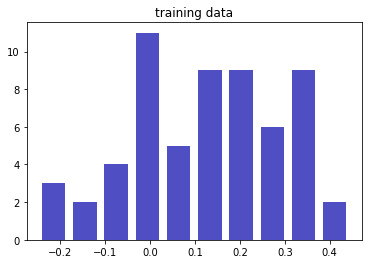

In [28]:
hist, bin_edges = np.histogram(np.array(correlations)[:,1])
# print(hist)
n, bins, patches = plt.hist(x=np.array(correlations)[:,1], bins=10, color='#0504aa',  alpha=0.7, rwidth=0.75)
plt.title("training data")

compute pearson correlation on test data

In [36]:
Y_test = []
for i in y_test :
  if i == 'M' :
    Y_test.append(1)
  else :
    Y_test.append(-1)
Y_test = np.array(Y_test)
correlations = []
for i in range(len(X_all[0])):
  corr = np.corrcoef(np.array(X_test[:,i]).astype(float),Y_test.astype(float))
  # print("correlation between "+str(i)+"th feature and tags = "+str(corr[0,1]))
  correlations.append([i,corr[0,1]])
correlations = sorted(correlations, key=lambda t: t[1], reverse=True)
print(correlations)
all_best_corelation.append(find_greater_than_3(correlations))

[[11, 0.4669193238199976], [9, 0.42968826375759056], [10, 0.39198020534565037], [45, 0.36613544273652526], [47, 0.36429868466273124], [46, 0.36298571352039094], [27, 0.3540756236301361], [43, 0.3466946607476779], [55, 0.34177615177048365], [48, 0.3394939463122705], [26, 0.3284270957357473], [44, 0.32783117499253983], [12, 0.32676930415682426], [50, 0.3117876299505372], [51, 0.3076611645591754], [8, 0.30651357088814735], [57, 0.3051992612727229], [20, 0.25496274225697335], [49, 0.24626492403780464], [42, 0.2443108595754879], [19, 0.24209190910227746], [13, 0.23463620368558097], [52, 0.22573963647251535], [18, 0.22274976478622655], [21, 0.20548904575244198], [59, 0.20258576535393905], [53, 0.19954051383111018], [0, 0.18744916723919497], [28, 0.17532577817284983], [54, 0.17191289923757083], [22, 0.14985642695059032], [38, 0.1381060130402911], [7, 0.11827558079985968], [17, 0.11758966181158251], [1, 0.1146466681788908], [23, 0.1095847205287524], [14, 0.10556098200656056], [25, 0.0896582320

show histogram

Text(0.5, 1.0, 'test data')

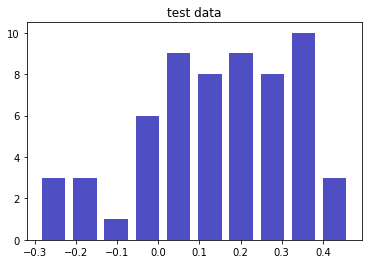

In [30]:
hist, bin_edges = np.histogram(np.array(correlations)[:,1])
# print(hist)
n, bins, patches = plt.hist(x=np.array(correlations)[:,1], bins=10, color='#0504aa',  alpha=0.7, rwidth=0.75)
plt.title("test data")

compute pearson correlation on validation data

In [37]:
Y_validation = []
for i in y_validation :
  if i == 'M' :
    Y_validation.append(1)
  else :
    Y_validation.append(-1)
Y_validation = np.array(Y_validation)
correlations = []
for i in range(len(X_all[0])):
  corr = np.corrcoef(np.array(X_validation[:,i]).astype(float),Y_validation.astype(float))
  # print("correlation between "+str(i)+"th feature and tags = "+str(corr[0,1]))
  correlations.append([i,corr[0,1]])
correlations = sorted(correlations, key=lambda t: t[1], reverse=True)
print(correlations)
all_best_corelation.append(find_greater_than_3(correlations))

[[19, 0.48177015410333535], [20, 0.4366525786431297], [18, 0.43410570692518863], [21, 0.42683376405478535], [4, 0.3394218561733216], [11, 0.33576242905157583], [5, 0.3344853944878072], [10, 0.3011569381224858], [17, 0.24679966036399753], [9, 0.237728107848665], [3, 0.21759535686693376], [12, 0.21550961804019145], [59, 0.20938535503559513], [8, 0.17906377664716422], [51, 0.1771391814549224], [52, 0.16727764262360176], [22, 0.154849168462611], [55, 0.13750538447954538], [38, 0.13440490409379394], [39, 0.13271004478284917], [26, 0.1311133691084666], [2, 0.12847378108935253], [7, 0.09987980254898204], [1, 0.09434279357792918], [41, 0.08743655623148584], [50, 0.08632640519067326], [25, 0.08062594565149961], [16, 0.059714526378165406], [53, 0.04445184892787844], [13, 0.03542933399041173], [42, 0.03027991042639969], [15, -0.004895697735314244], [14, -0.007314996086958155], [58, -0.00957527672191124], [40, -0.012488208156258803], [0, -0.0166468125653687], [27, -0.039306043538542716], [28, -0.0

show histogram

Text(0.5, 1.0, 'validation data')

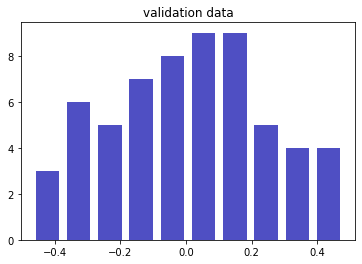

In [33]:
hist, bin_edges = np.histogram(np.array(correlations)[:,1])
# print(hist)
n, bins, patches = plt.hist(x=np.array(correlations)[:,1], bins=10, color='#0504aa',  alpha=0.7, rwidth=0.75)
plt.title("validation data")

find best feature

In [44]:
t1 = np.array(all_best_corelation[0])
t2 = np.array(all_best_corelation[1])
t3 = np.array(all_best_corelation[2])
for x in t1[:,0]:
  if x in t2[:,0] and x in t3[:,0] :
    print(x)
    temp = []
    temp.append(t1[np.where(t1[:,0]==x)[0][0]][1])
    temp.append(t2[np.where(t2[:,0]==x)[0][0]][1])
    temp.append(t3[np.where(t3[:,0]==x)[0][0]][1])
    print(temp)


10.0
[0.44579803005551183, 0.39198020534565037, 0.3011569381224858]
11.0
[0.3606028576211914, 0.4669193238199976, 0.33576242905157583]
